In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()

Saving digitsnpixels.csv to digitsnpixels (1).csv


In [ ]:
import pandas as pd
A = pd.read_csv("digitsnpixels (1).csv")

In [ ]:
A[12:15]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
28*28

784

In [ ]:
Y = A["label"].values
print(Y)

[1 0 1 ... 7 6 9]


In [ ]:
X = A.iloc[:,1:785].values
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X.shape

(42000, 784)

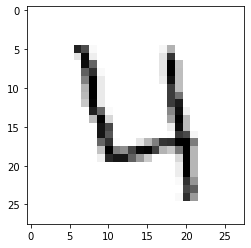

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[3].reshape(28,28),cmap=plt.cm.binary)

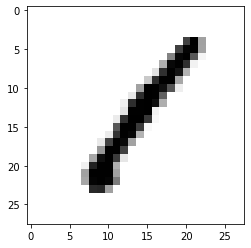

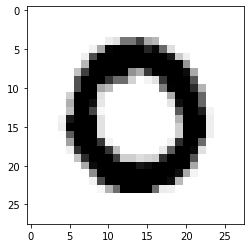

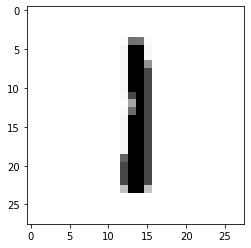

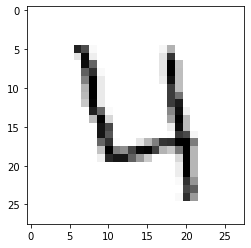

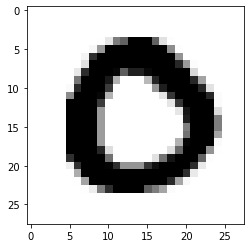

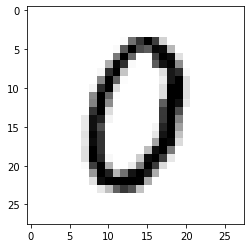

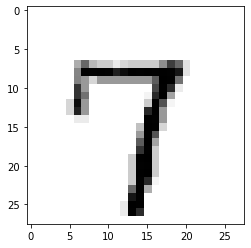

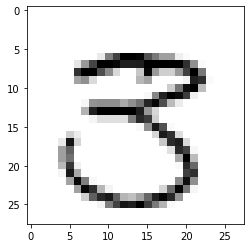

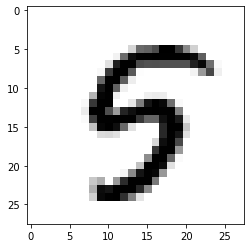

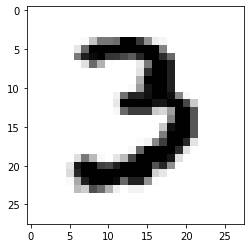

In [ ]:
for i in range(0,10,1):
    plt.imshow(X[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()

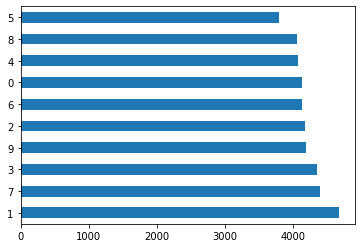

In [ ]:
A.label.value_counts().plot(kind="barh")

In [ ]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

In [ ]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X = X/255 #Scaled X to minmax

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=41)

In [ ]:
xtrain.shape

(33600, 784)

In [ ]:
xtest.shape

(8400, 784)

In [ ]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [ ]:
# CNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization

In [ ]:
nn = Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Flatten())
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=10,activation="softmax"))


In [ ]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 16)          6

In [ ]:
nn.fit(xtrain,ytrain,batch_size=64,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
525/525 [==============================] - 20s 37ms/step - loss: 0.3371 - accuracy: 0.8893 - val_loss: 0.1283 - val_accuracy: 0.9583
Epoch 2/2
525/525 [==============================] - 18s 34ms/step - loss: 0.1261 - accuracy: 0.9592 - val_loss: 0.0668 - val_accuracy: 0.9808


In [ ]:
nn.evaluate(xtest,ytest,batch_size=64)

132/132 [==============================] - 2s 12ms/step - loss: 0.0668 - accuracy: 0.9808


[0.06678802520036697, 0.9808333516120911]

In [ ]:
from numpy import argmax
pred = nn.predict(xtest)

In [ ]:
pred

array([[6.5605994e-04, 1.3891564e-06, 1.5791047e-04, ..., 1.6698850e-06,
        9.9340385e-01, 4.3618632e-04],
       [1.3169606e-05, 2.7573999e-06, 2.7836089e-03, ..., 5.7544862e-04,
        6.5208733e-05, 1.2520525e-04],
       [2.8180487e-11, 2.6357881e-08, 1.7411108e-05, ..., 9.0670142e-07,
        2.7171305e-07, 1.0205830e-07],
       ...,
       [4.6180628e-07, 2.7402818e-09, 5.1293193e-07, ..., 4.6082099e-10,
        1.9847680e-06, 3.2697148e-08],
       [4.3179099e-07, 4.3578666e-08, 3.9106510e-07, ..., 5.7867423e-11,
        6.4385135e-06, 1.7639911e-08],
       [8.3727930e-10, 1.2235545e-10, 6.3796257e-08, ..., 3.9104284e-09,
        1.4521595e-04, 3.1315326e-06]], dtype=float32)

In [ ]:
xtest.shape

(8400, 28, 28, 1)

In [ ]:
pred = argmax(pred,axis=1)

In [ ]:
XT = xtest*255

In [ ]:
XT

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

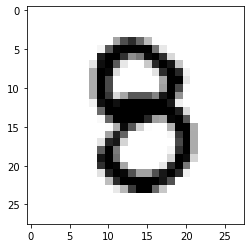

In [ ]:
plt.imshow(XT[0].reshape(28,28),cmap=plt.cm.binary)

In [ ]:

pred[0]

8

--------------
Predicted value 8
--------------


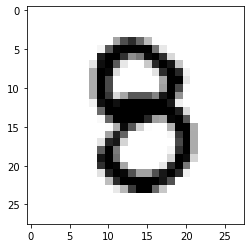

--------------
Predicted value 4
--------------


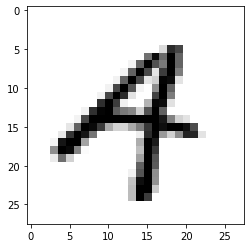

--------------
Predicted value 3
--------------


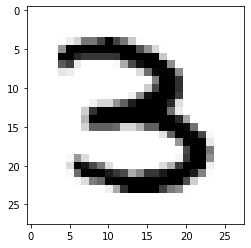

--------------
Predicted value 3
--------------


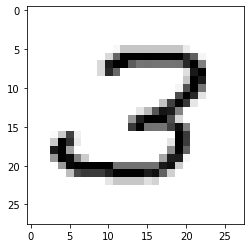

--------------
Predicted value 2
--------------


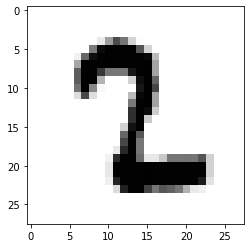

--------------
Predicted value 0
--------------


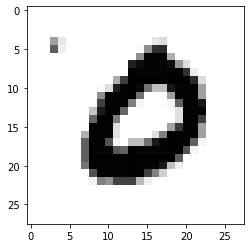

--------------
Predicted value 6
--------------


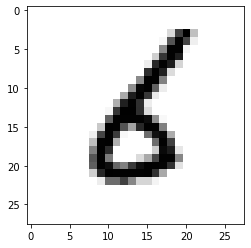

--------------
Predicted value 2
--------------


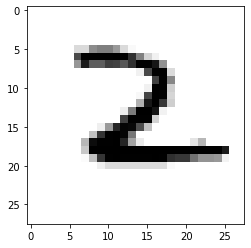

--------------
Predicted value 6
--------------


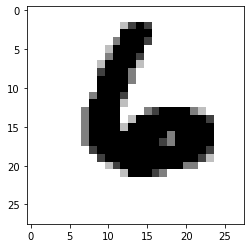

--------------
Predicted value 2
--------------


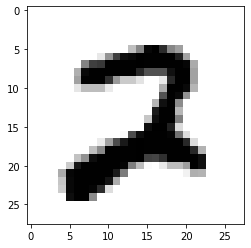

In [ ]:
for i in range(0,10,1):
    print("--------------")
    print("Predicted value",pred[i])
    print("--------------")
    plt.imshow(XT[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()